<a href="https://www.kaggle.com/code/priyam8210/final-yr-demo?scriptVersionId=204834301" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
well_test_data = pd.read_csv("/kaggle/input/final-yr-project-data/EDB_02_Raw_Data_Injection_Gauge.csv",  header=None)
reservoir_properties = pd.read_excel("/kaggle/input/final-yr-project-data/Reservoir_Information.xlsx", sheet_name="Information")
rate_history = pd.read_excel("/kaggle/input/final-yr-project-data/Reservoir_Information.xlsx", sheet_name="Rate_Schedule")
injection_history = pd.read_excel("/kaggle/input/final-yr-project-data/Reservoir_Information.xlsx", sheet_name="Injection_Schedule")

In [3]:
rate_history


,Flow Period,End_Time,FlowRate
0,0,0.000000,0.000000
1,1,0.166667,2.201580
2,2,5.000000,0.348273
3,3,9.059444,0.550395


In [4]:
injection_history.head()

,Hrs,Rate_Actual_BPD,Rate_Average_LPM,Rate_Average_BPD
0,0.000000,0.00000,0.000000,0.000000
1,0.083333,2.93544,0.243000,2.201580
2,0.166667,1.46772,0.243000,2.201580
3,0.333333,0.00000,0.038441,0.348273
4,0.500000,0.00000,0.038441,0.348273


In [5]:
well_test_data

,0,1,2,3,4,5
0,1,02-07-2024 07:55,0.000278,0.083837,29.464925,'
1,2,02-07-2024 07:55,0.000556,0.083861,29.476952,'
2,3,02-07-2024 07:55,0.000833,0.083563,29.484102,'
3,4,02-07-2024 07:55,0.001111,0.082731,29.493327,'
4,5,02-07-2024 07:55,0.001389,0.082442,29.503041,'
...,...,...,...,...,...,...
567456,567457,08-07-2024 21:33,157.626944,27.264224,29.103718,'
567457,567458,08-07-2024 21:33,157.627222,27.267865,29.104595,'
567458,567459,08-07-2024 21:33,157.627500,27.272920,29.105251,'
567459,567460,08-07-2024 21:33,157.627778,27.280340,29.105616,'


In [6]:
well_test_data.iloc[:, 1]

0         02-07-2024 07:55
1         02-07-2024 07:55
2         02-07-2024 07:55
3         02-07-2024 07:55
4         02-07-2024 07:55
                ...       
567456    08-07-2024 21:33
567457    08-07-2024 21:33
567458    08-07-2024 21:33
567459    08-07-2024 21:33
567460    08-07-2024 21:33
Name: 1, Length: 567461, dtype: object

In [7]:
date = well_test_data.iloc[:, 1]
time_hrs = well_test_data.iloc[:, 2].to_numpy()
pwf_hrs = well_test_data.iloc[:, 3].to_numpy()

## confirm column name

In [8]:
time_hrs

array([2.77778000e-04, 5.55556000e-04, 8.33333000e-04, ...,
       1.57627500e+02, 1.57627778e+02, 1.57628056e+02])

In [9]:
well_test_table = [time_hrs, pwf_hrs]

In [10]:
well_test_table

[array([2.77778000e-04, 5.55556000e-04, 8.33333000e-04, ...,
        1.57627500e+02, 1.57627778e+02, 1.57628056e+02]),
 array([ 0.08383741,  0.0838614 ,  0.08356338, ..., 27.27292022,
        27.28033989, 27.28850635])]

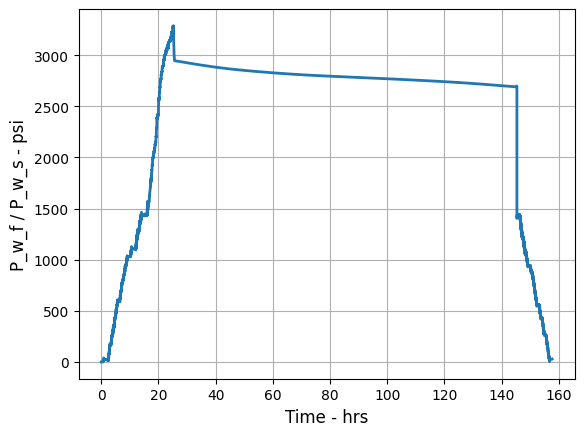

In [11]:
plt.figure()
plt.plot(time_hrs, pwf_hrs, linewidth=2)
plt.xlabel('Time - hrs', fontsize=12)
plt.ylabel('P_w_f / P_w_s - psi', fontsize=12)
plt.grid(True)
plt.show()

In [12]:
injection_start_time = 16.3322
injection_end_time = 25.2925
falloff_end_time = 145.164
injection_period = injection_end_time - injection_start_time

In [13]:
extracted_data = well_test_data[(time_hrs >= injection_end_time) & (time_hrs <= falloff_end_time)]
fall_off_time = extracted_data.iloc[:, 2].to_numpy()
fall_off_pressure = extracted_data.iloc[:, 3].to_numpy()
fall_off_pressure1 = fall_off_pressure[0] - fall_off_pressure

In [14]:
well_test_table1 = pd.DataFrame({'fall_off_time': fall_off_time, 'fall_off_pressure': fall_off_pressure, 'fall_off_pressure1': fall_off_pressure1})

In [15]:
well_test_table1

,fall_off_time,fall_off_pressure,fall_off_pressure1
0,25.292500,3287.106800,0.000000
1,25.292778,3286.687621,0.419179
2,25.293056,3285.925673,1.181127
3,25.293333,3285.363256,1.743544
4,25.293611,3283.923763,3.183037
...,...,...,...
431533,145.162778,2690.607265,596.499535
431534,145.163056,2690.608007,596.498793
431535,145.163333,2690.609261,596.497539
431536,145.163611,2690.612597,596.494203


In [16]:
extracted_data1 = well_test_table1[(well_test_table1.iloc[:, 2]>0)]
fall_off_time = extracted_data1['fall_off_time'].to_numpy()
fall_off_pressure = extracted_data1['fall_off_pressure'].to_numpy()
delta_t_hrs = fall_off_time - fall_off_time[0]

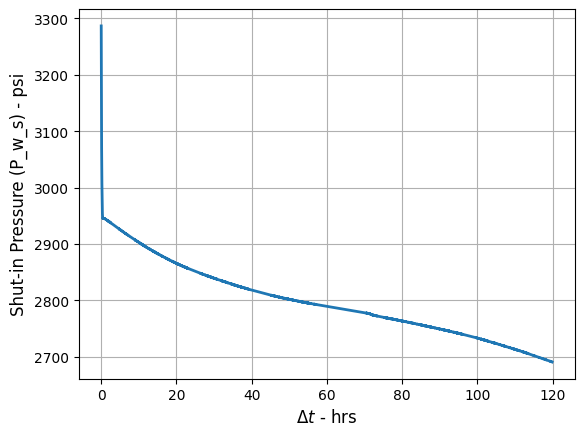

In [17]:
plt.figure()
plt.plot(delta_t_hrs, fall_off_pressure, linewidth=2)
plt.xlabel(r'$\Delta t$ - hrs', fontsize=12)
plt.ylabel('Shut-in Pressure (P_w_s) - psi', fontsize=12)
plt.grid(True)
plt.show()

In [18]:
h_1 = len(rate_history)
q_last = rate_history['FlowRate'].iloc[-1]

effective_time = injection_period * delta_t_hrs / (injection_period + delta_t_hrs)
delta_p_psi = fall_off_pressure[0] - fall_off_pressure
dPdt = np.diff(delta_p_psi) / np.diff(effective_time)
h = len(delta_t_hrs)
smoothing_parameter = 0.03

In [19]:
pressure_derivative = np.concatenate(([np.nan], effective_time[:-1] * dPdt))
build_up_time = (injection_period+delta_t_hrs)/(delta_t_hrs)
log_effective_time = np.log(effective_time)
T1 = pd.DataFrame({'delta_t_hrs': delta_t_hrs, 'effective_time': effective_time, 'fall_off_pressure': fall_off_pressure, 'delta_p_psi': delta_p_psi, 'log_effective_time': log_effective_time})

/tmp/ipykernel_36/2105199667.py:2: RuntimeWarning: divide by zero encountered in divide
  build_up_time = (injection_period+delta_t_hrs)/(delta_t_hrs)
/tmp/ipykernel_36/2105199667.py:3: RuntimeWarning: divide by zero encountered in log
  log_effective_time = np.log(effective_time)


In [20]:
T1

,delta_t_hrs,effective_time,fall_off_pressure,delta_p_psi,log_effective_time
0,0.000000,0.000000,3286.687621,0.000000,-inf
1,0.000278,0.000278,3285.925673,0.761948,-8.188712
2,0.000556,0.000556,3285.363256,1.324365,-7.495614
3,0.000833,0.000833,3283.923763,2.763858,-7.090174
4,0.001111,0.001111,3281.228335,5.459286,-6.802520
...,...,...,...,...,...
431532,119.870000,8.337101,2690.607265,596.080356,2.120715
431533,119.870278,8.337102,2690.608007,596.079614,2.120716
431534,119.870556,8.337103,2690.609261,596.078360,2.120716
431535,119.870833,8.337105,2690.612597,596.075024,2.120716


In [21]:
T1 = T1[(T1['effective_time']!=0)]
T1 = pd.DataFrame(T1)

In [22]:
T1.index = range(len(T1))

In [23]:
T1

,delta_t_hrs,effective_time,fall_off_pressure,delta_p_psi,log_effective_time
0,0.000278,0.000278,3285.925673,0.761948,-8.188712
1,0.000556,0.000556,3285.363256,1.324365,-7.495614
2,0.000833,0.000833,3283.923763,2.763858,-7.090174
3,0.001111,0.001111,3281.228335,5.459286,-6.802520
4,0.001389,0.001389,3283.500245,3.187376,-6.579405
...,...,...,...,...,...
431531,119.870000,8.337101,2690.607265,596.080356,2.120715
431532,119.870278,8.337102,2690.608007,596.079614,2.120716
431533,119.870556,8.337103,2690.609261,596.078360,2.120716
431534,119.870833,8.337105,2690.612597,596.075024,2.120716


In [24]:
h1 = len(T1)
summation_ = [0]*h1
superposition_time = [0]*h1

for i in range(h1):
    sum = 0
    for k in range(1, h_1):
        x1 = rate_history.loc[k-1, 'FlowRate'] - rate_history.loc[k, 'FlowRate']
        a1 = rate_history.loc[h_1-1, 'End_Time'] + T1.loc[i, 'delta_t_hrs'] - rate_history.loc[k-1,'End_Time']
        b1 = rate_history.loc[h_1-1, 'End_Time'] - rate_history.loc[k-1, 'End_Time']
        y1 = np.log10(a1/b1)
        z1 = (x1*y1)/q_last
        sum = sum + z1
        
    summation_[i] = sum+ np.log10(T1.delta_t_hrs[i])
    superposition_time[i] = 10**(summation_[i])
    
T1['summation_'] = np.transpose(summation_)
T1['superposition_time'] = np.transpose(superposition_time)
T1['log_superposition_time'] = np.log10(T1['superposition_time'])

In [25]:
offset_log_superposition_time = [0]*(h1)
offset_delta_pressure = [0]*(h1)

for i in range(h1):
    offset_log_superposition_time[i] = T1.loc[h1-i-1, 'log_superposition_time']
    offset_delta_pressure[i] = T1.loc[h1-i-1, 'delta_p_psi']
    
T1['offset_log_superposition_time'] = -1*np.transpose(offset_log_superposition_time)
T1['offset_delta_pressure'] = np.transpose(offset_delta_pressure)

    


In [26]:
int_xl = interp1d(T1['log_superposition_time'], T1['log_superposition_time'], fill_value = "extrapolate")
int_pl = interp1d(T1['log_superposition_time'], T1['delta_p_psi'], fill_value = "extrapolate")
int_xr = interp1d( T1['offset_log_superposition_time'], -T1['offset_log_superposition_time'], fill_value = "extrapolate")
int_pr = interp1d( T1['offset_log_superposition_time'], T1['offset_delta_pressure'], fill_value = "extrapolate")

T1['XL'] = int_xl(T1['log_superposition_time'] - smoothing_parameter)
T1['PL'] = int_pl(T1['log_superposition_time'] - smoothing_parameter)
T1['XR'] = -1 * int_xr((-1 * T1['log_superposition_time']) - smoothing_parameter)
T1['PR'] = int_pr((-1 * T1['log_superposition_time']) - smoothing_parameter)

# Calculate slopes 
T1['mL'] = (T1['delta_p_psi'] - T1['PL']) / (T1['log_superposition_time'] - T1['XL'])
T1['mR'] = (T1['PR'] - T1['delta_p_psi']) / (T1['XR'] - T1['log_superposition_time'])

# Calculate m_graph1
T1['m_graph1'] = ((T1['mL'] * (T1['XR'] - T1['log_superposition_time'])) + 
                   (T1['mR'] * (T1['log_superposition_time'] - T1['XL']))) / (T1['XR'] - T1['XL'])

# Calculate PPD1
T1['PPD1'] = T1['m_graph1'] / T1['superposition_time']

In [27]:
T1

,delta_t_hrs,effective_time,fall_off_pressure,delta_p_psi,log_effective_time,summation_,superposition_time,log_superposition_time,offset_log_superposition_time,offset_delta_pressure,XL,PL,XR,PR,mL,mR,m_graph1,PPD1
0,0.000278,0.000278,3285.925673,0.761948,-8.188712,-3.556318,0.000278,-3.556318,-0.829001,596.071157,-3.586318,0.705894,3.526318,0.818002,1.868472,0.007914,1.860625,6698.480353
1,0.000556,0.000556,3285.363256,1.324365,-7.495614,-3.255314,0.000556,-3.255314,-0.829001,596.075024,-3.285314,1.268311,3.225314,1.569628,1.868472,0.037846,1.860037,3348.385143
2,0.000833,0.000833,3283.923763,2.763858,-7.090174,-3.079238,0.000833,-3.079238,-0.829001,596.078360,-3.109238,2.518595,3.049238,3.411167,8.175437,0.105623,8.136126,9764.637612
3,0.001111,0.001111,3281.228335,5.459286,-6.802520,-2.954317,0.001111,-2.954317,-0.829001,596.079614,-2.984317,4.811977,2.924317,4.755852,21.576967,-0.119659,21.466806,19323.436617
4,0.001389,0.001389,3283.500245,3.187376,-6.579405,-2.857425,0.001389,-2.857425,-0.829000,596.080356,-2.887425,3.890810,2.827425,3.709993,-23.447787,0.091932,-23.324216,-16796.998316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431531,119.870000,8.337101,2690.607265,596.080356,2.120715,0.829000,6.745288,0.829000,2.857425,3.187376,0.799000,491.439524,-0.859000,-1307.736180,3488.027718,1127.852744,3530.732909,523.436949
431532,119.870278,8.337102,2690.608007,596.079614,2.120716,0.829001,6.745289,0.829001,2.954317,5.459286,0.799001,491.438103,-0.859001,-1307.740047,3488.050365,1127.854514,3530.755931,523.440289
431533,119.870556,8.337103,2690.609261,596.078360,2.120716,0.829001,6.745290,0.829001,3.079238,2.763858,0.799001,491.436682,-0.859001,-1307.743913,3488.055928,1127.855980,3530.761565,523.441051
431534,119.870833,8.337105,2690.612597,596.075024,2.120716,0.829001,6.745291,0.829001,3.255314,1.324365,0.799001,491.435261,-0.859001,-1307.747780,3487.992109,1127.856213,3530.696583,523.431343


In [28]:
dpdt_1 = (np.diff(T1['delta_p_psi']))/(np.diff(T1['superposition_time']))
dpdt_1 = np.insert(dpdt_1, 0, np.nan)
T1['pressure_derivative'] = T1['superposition_time']*dpdt_1

In [29]:
T1['offset_log_effective_time'] = -T1['log_effective_time'].iloc[::-1].reset_index(drop=True)

In [30]:
T1

,delta_t_hrs,effective_time,fall_off_pressure,delta_p_psi,log_effective_time,summation_,superposition_time,log_superposition_time,offset_log_superposition_time,offset_delta_pressure,XL,PL,XR,PR,mL,mR,m_graph1,PPD1,pressure_derivative,offset_log_effective_time
0,0.000278,0.000278,3285.925673,0.761948,-8.188712,-3.556318,0.000278,-3.556318,-0.829001,596.071157,-3.586318,0.705894,3.526318,0.818002,1.868472,0.007914,1.860625,6698.480353,NaN,-2.120716
1,0.000556,0.000556,3285.363256,1.324365,-7.495614,-3.255314,0.000556,-3.255314,-0.829001,596.075024,-3.285314,1.268311,3.225314,1.569628,1.868472,0.037846,1.860037,3348.385143,1.124902,-2.120716
2,0.000833,0.000833,3283.923763,2.763858,-7.090174,-3.079238,0.000833,-3.079238,-0.829001,596.078360,-3.109238,2.518595,3.049238,3.411167,8.175437,0.105623,8.136126,9764.637612,4.318795,-2.120716
3,0.001111,0.001111,3281.228335,5.459286,-6.802520,-2.954317,0.001111,-2.954317,-0.829001,596.079614,-2.984317,4.811977,2.924317,4.755852,21.576967,-0.119659,21.466806,19323.436617,10.782993,-2.120716
4,0.001389,0.001389,3283.500245,3.187376,-6.579405,-2.857425,0.001389,-2.857425,-0.829000,596.080356,-2.887425,3.890810,2.827425,3.709993,-23.447787,0.091932,-23.324216,-16796.998316,-11.361404,-2.120715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431531,119.870000,8.337101,2690.607265,596.080356,2.120715,0.829000,6.745288,0.829000,2.857425,3.187376,0.799000,491.439524,-0.859000,-1307.736180,3488.027718,1127.852744,3530.732909,523.436949,-11146.651200,6.579405
431532,119.870278,8.337102,2690.608007,596.079614,2.120716,0.829001,6.745289,0.829001,2.954317,5.459286,0.799001,491.438103,-0.859001,-1307.740047,3488.050365,1127.854514,3530.755931,523.440289,-5288.268783,6.802520
431533,119.870556,8.337103,2690.609261,596.078360,2.120716,0.829001,6.745290,0.829001,3.079238,2.763858,0.799001,491.436682,-0.859001,-1307.743913,3488.055928,1127.855980,3530.761565,523.441051,-8940.574902,7.090174
431534,119.870833,8.337105,2690.612597,596.075024,2.120716,0.829001,6.745291,0.829001,3.255314,1.324365,0.799001,491.435261,-0.859001,-1307.747780,3487.992109,1127.856213,3530.696583,523.431343,-23776.040672,7.495614


In [31]:
int_xl = interp1d(T1['log_effective_time'], T1['log_effective_time'], fill_value = "extrapolate")
int_pl = interp1d(T1['log_effective_time'], T1['delta_p_psi'], fill_value = "extrapolate")
int_xr = interp1d( T1['offset_log_superposition_time'], -T1['offset_log_superposition_time'], fill_value = "extrapolate")
int_pr = interp1d( T1['offset_log_superposition_time'], T1['offset_delta_pressure'], fill_value = "extrapolate")

T1['XL1'] = int_xl(T1['log_superposition_time'] - smoothing_parameter)
T1['PL1'] = int_pl(T1['log_superposition_time'] - smoothing_parameter)
T1['XR1'] = -1 * int_xr((-1 * T1['log_effective_time']) - smoothing_parameter)
T1['PR1'] = int_pr((-1 * T1['log_effective_time']) - smoothing_parameter)

# Calculate slopes 
T1['mL1'] = (T1['delta_p_psi'] - T1['PL1']) / (T1['log_effective_time'] - T1['XL'])
T1['mR1'] = (T1['PR1'] - T1['delta_p_psi']) / (T1['XR'] - T1['log_effective_time'])

# Calculate m_graph1
T1['m_graph_effective_time'] = ((T1['mL1'] * (T1['XR1'] - T1['log_effective_time'])) + 
                   (T1['mR1'] * (T1['log_effective_time'] - T1['XL1']))) / (T1['XR1'] - T1['XL1'])


In [32]:
T1

,delta_t_hrs,effective_time,fall_off_pressure,delta_p_psi,log_effective_time,summation_,superposition_time,log_superposition_time,offset_log_superposition_time,offset_delta_pressure,...,PPD1,pressure_derivative,offset_log_effective_time,XL1,PL1,XR1,PR1,mL1,mR1,m_graph_effective_time
0,0.000278,0.000278,3285.925673,0.761948,-8.188712,-3.556318,0.000278,-3.556318,-0.829001,596.071157,...,6698.480353,NaN,-2.120716,-3.586318,89.643299,8.158712,-7.837498,19.311980,-0.734052,27.167196
1,0.000556,0.000556,3285.363256,1.324365,-7.495614,-3.255314,0.000556,-3.255314,-0.829001,596.075024,...,3348.385143,1.124902,-2.120716,-3.285314,117.172905,7.465614,-6.542464,27.515506,-0.733782,38.578550
2,0.000833,0.000833,3283.923763,2.763858,-7.090174,-3.079238,0.000833,-3.079238,-0.829001,596.078360,...,9764.637612,4.318795,-2.120716,-3.109238,131.131872,7.060174,-5.784910,32.245692,-0.843123,45.198695
3,0.001111,0.001111,3281.228335,5.459286,-6.802520,-2.954317,0.001111,-2.954317,-0.829001,596.079614,...,19323.436617,10.782993,-2.120716,-2.984317,140.777008,6.772520,-5.247436,35.440161,-1.100740,49.739936
4,0.001389,0.001389,3283.500245,3.187376,-6.579405,-2.857425,0.001389,-2.857425,-0.829000,596.080356,...,-16796.998316,-11.361404,-2.120715,-2.887425,148.768978,6.549405,-4.830553,39.431842,-0.852352,55.192269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431531,119.870000,8.337101,2690.607265,596.080356,2.120715,0.829000,6.745288,0.829000,2.857425,3.187376,...,523.436949,-11146.651200,6.579405,0.799000,351.434546,-2.150715,-83280.952375,185.097248,28149.338100,-12345.179214
431532,119.870278,8.337102,2690.608007,596.079614,2.120716,0.829001,6.745289,0.829001,2.954317,5.459286,...,523.440289,-5288.268783,6.802520,0.799001,351.434549,-2.150716,-83280.962604,185.096670,28149.339186,-12345.180543
431533,119.870556,8.337103,2690.609261,596.078360,2.120716,0.829001,6.745290,0.829001,3.079238,2.763858,...,523.441051,-8940.574902,7.090174,0.799001,351.434551,-2.150716,-83280.972830,185.095705,28149.340099,-12345.182356
431534,119.870833,8.337105,2690.612597,596.075024,2.120716,0.829001,6.745291,0.829001,3.255314,1.324365,...,523.431343,-23776.040672,7.495614,0.799001,351.434554,-2.150716,-83280.983058,185.093165,28149.340314,-12345.186138


In [33]:
b1 = 1.0
a1 = (T1['delta_p_psi'].iloc[8])/(T1['delta_t_hrs'].iloc[8]**b1)
T1['p_line_fall_off'] = a1* ((T1['delta_t_hrs'])**b1)

In [34]:
T1['pressure_derivative']

0                  NaN
1             1.124902
2             4.318795
3            10.782993
4           -11.361404
              ...     
431531   -11146.651200
431532    -5288.268783
431533    -8940.574902
431534   -23776.040672
431535   -27560.659875
Name: pressure_derivative, Length: 431536, dtype: float64

In [35]:
T1['pressure_derivative'].value_counts()

pressure_derivative
 0.000000        54
 1.124902         1
-23101.923620     1
-2459.151682      1
 9604.053592      1
                 ..
 10288.452419     1
 6531.113359      1
 6068.569263      1
 1415.254249      1
-27560.659875     1
Name: count, Length: 431482, dtype: int64

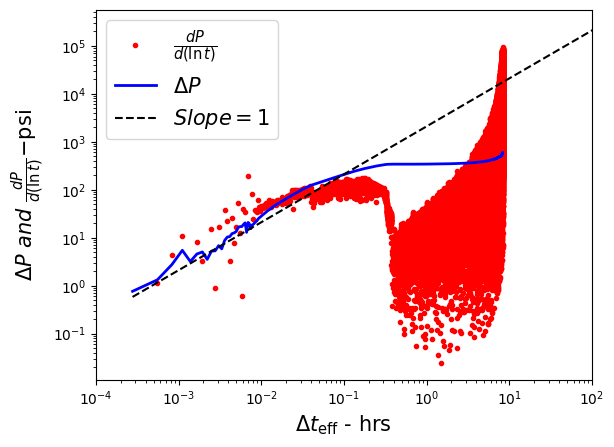

In [36]:
fig, ax = plt.subplots()

plot1, = ax.loglog(T1['effective_time'], T1['pressure_derivative'], 'r.', label=r'$\frac{dP}{d(\ln t)}$')
plot2, = ax.loglog(T1['effective_time'], T1['delta_p_psi'], 'b', linewidth=2, label=r'$\Delta P$')
plot3, = ax.loglog(T1['delta_t_hrs'], T1['p_line_fall_off'], 'k--', label=r'$Slope = 1$')

ax.set_xlim([0.0001, 100])
xlabel = r'$\Delta t_{\mathrm{eff}}$ - hrs'
ylabel = r'$\Delta P \ and\  \frac{dP}{d(\ln t)}  \mathrm{-} \mathrm{psi}$'
ax.set_xlabel(xlabel, fontsize=15)
ax.set_ylabel(ylabel, fontsize=15, fontweight='bold')
ax.legend(fontsize=15, loc='upper left')
plt.show()


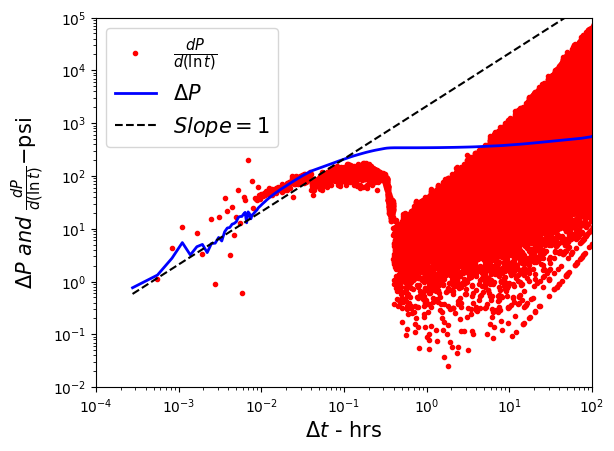

In [37]:
fig, ax = plt.subplots()

plot1, = ax.loglog(T1['delta_t_hrs'], T1['pressure_derivative'], 'r.', label=r'$\frac{dP}{d(\ln t)}$')
plot2, = ax.loglog(T1['delta_t_hrs'], T1['delta_p_psi'], 'b', linewidth=2, label=r'$\Delta P$')
plot3, = ax.loglog(T1['delta_t_hrs'], T1['p_line_fall_off'], 'k--', label=r'$Slope = 1$')

ax.set_xlim([0.0001, 100])
ax.set_ylim([0.01, 100000])
xlabel = r'$\Delta t$ - hrs'
ylabel = r'$\Delta P \ and\  \frac{dP}{d(\ln t)}  \mathrm{-} \mathrm{psi}$'
ax.set_xlabel(xlabel, fontsize=15)
ax.set_ylabel(ylabel, fontsize=15, fontweight='bold')
ax.legend(fontsize=15, loc='upper left')
plt.show()

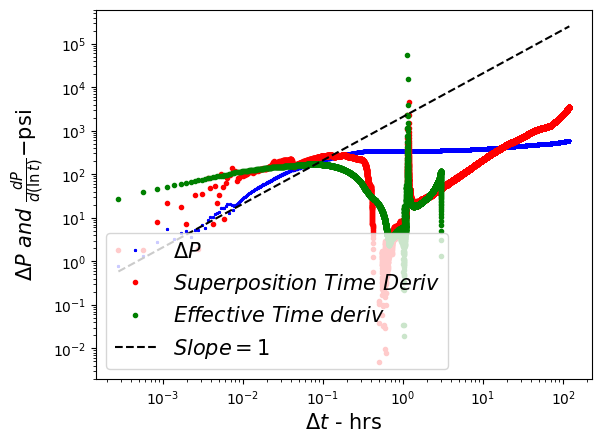

In [38]:
fig, ax = plt.subplots()

plot1, = ax.loglog(T1['delta_t_hrs'], T1['delta_p_psi'], 'b*',markersize = 2, label=r'$\Delta P$')
plot2, = ax.loglog(T1['delta_t_hrs'], T1['m_graph1'], 'r.', linewidth=2, label=r'$Superposition\ Time\ Deriv$')
plot3, = ax.loglog(T1['delta_t_hrs'], T1['m_graph_effective_time'], 'g.', linewidth=2, label=r'$Effective\ Time\ deriv$')
plot4, = ax.loglog(T1['delta_t_hrs'], T1['p_line_fall_off'], 'k--', label=r'$Slope = 1$')

xlabel = r'$\Delta t$ - hrs'
ylabel = r'$\Delta P \ and\  \frac{dP}{d(\ln t)}  \mathrm{-} \mathrm{psi}$'
ax.set_xlabel(xlabel, fontsize=15)
ax.set_ylabel(ylabel, fontsize=15, fontweight='bold')
ax.legend(fontsize=15, loc='lower left')
plt.show()

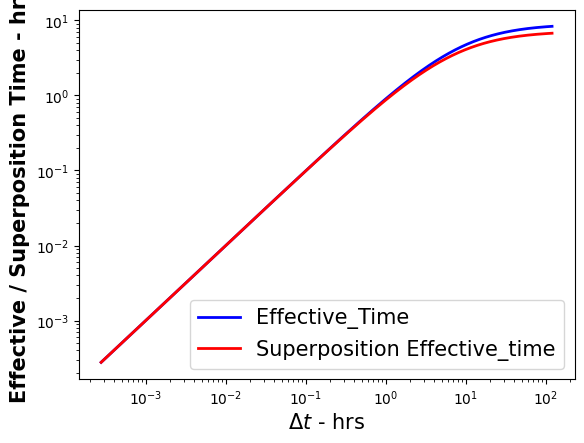

In [39]:
fig, ax = plt.subplots()

plot1, = ax.loglog(T1['delta_t_hrs'], T1['effective_time'], 'b', linewidth = 2, label='Effective_Time')
plot2, = ax.loglog(T1['delta_t_hrs'], T1['superposition_time'], 'r', linewidth=2, label='Superposition Effective_time')

xlabel = r'$\Delta t$ - hrs'
ylabel = 'Effective / Superposition Time - hrs'
ax.set_xlabel(xlabel, fontsize=15)
ax.set_ylabel(ylabel, fontsize=15, fontweight='bold')
ax.legend(fontsize=15, loc='lower right')
plt.show()

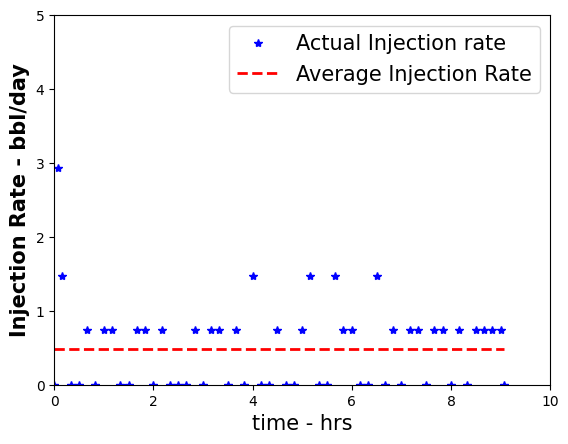

In [40]:
fig, ax = plt.subplots()

plot1, = ax.plot(injection_history['Hrs'], injection_history['Rate_Actual_BPD'], 'b*', linewidth = 2, label='Actual Injection rate')
injection_history['Cumulative_Avg_Rate'] = injection_history['Rate_Actual_BPD'].mean()
plot2, = ax.plot(injection_history['Hrs'], injection_history['Cumulative_Avg_Rate'], 'r--', linewidth=2, label='Average Injection Rate')

ax.set_xlim([0, 10])
ax.set_ylim([0, 5])
ax.set_xlabel('time - hrs', fontsize=15)
ax.set_ylabel('Injection Rate - bbl/day', fontsize=15, fontweight='bold')
ax.legend(fontsize=15, loc='upper right')
plt.show()

enter x2_1 value 6
enter x2_2 value 4
enter y2_1 value 8
enter y2_2 value 3
enter x3 value 9
enter y3 value 3
enter x4 value 7
enter y4 value 5


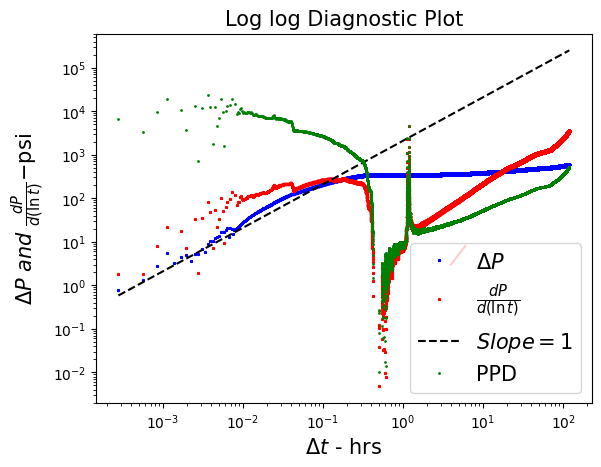

In [41]:
fig, ax = plt.subplots()

plot1, = ax.loglog(T1['delta_t_hrs'], T1['delta_p_psi'], 'b*',markersize = 2, label=r'$\Delta P$')
plot2, = ax.loglog(T1['delta_t_hrs'], T1['m_graph1'], 'r*', markersize=2, label=r'$\frac{dP}{d(\ln t)}$')
plot3, = ax.loglog(T1['delta_t_hrs'], T1['p_line_fall_off'], 'k--', label=r'$Slope = 1$')
plot4, = ax.loglog(T1['delta_t_hrs'], T1['PPD1'], 'g.', markersize = 2, label='PPD')

ax.set_xlabel(r'$\Delta t$ - hrs', fontsize=15)
ax.set_ylabel(r'$\Delta P \ and\  \frac{dP}{d(\ln t)}  \mathrm{-} \mathrm{psi}$', fontsize=15, fontweight='bold')
ax.legend(fontsize=15, loc='lower right')

x2_1 = float(input("enter x2_1 value"))
x2_2 = float(input("enter x2_2 value"))
y2_1 = float(input("enter y2_1 value"))
y2_2 = float(input("enter y2_2 value"))

plot5, = ax.plot([x2_1, x2_2],[y2_1, y2_2], 'r')

stabilization = (y2_1+y2_2)/2
ax2 = fig.add_axes(ax.get_position(), visible = False)

perm_derivative = (70.6 * reservoir_properties['Flow_Rate'].iloc[0] * reservoir_properties['Viscosity'].iloc[0] * reservoir_properties['FVF'].iloc[0] / stabilization /
                   reservoir_properties['Formation_Thickness'].iloc[0])

x3 = float(input("enter x3 value"))
y3 = float(input("enter y3 value"))

plot6,  = ax.plot(x3, y3, 'b')

delta_p_for_skin = y3

skin = 1.15 * ((delta_p_for_skin / 2.303 / stabilization) - np.log10(x3) - (np.log10(perm_derivative / reservoir_properties['Porosity'].iloc[0] /
                         reservoir_properties['Viscosity'].iloc[0] /reservoir_properties['Total_Compressibility'].iloc[0] /reservoir_properties['Wellbore_Radius'].iloc[0]**2)) + 3.23)

x4 = float(input("enter x4 value"))
y4 = float(input("enter y4 value"))

plot7,  = ax.plot(x4, y4, 'r')
time_for_Cs = x4
slope_wellbore_storage = y4/time_for_Cs

wellbore_storage_constant = (reservoir_properties['FVF'].iloc[0]/24/slope_wellbore_storage)

ax2.legend([plot5, plot6, plot7], f'Stabilization = {stabilization:.2f};\n'f'Permeability = {perm_derivative:.2f}; Skin = {skin:.2f}; \n'f'Cs = {wellbore_storage_constant:.2f} bbl/psi',
            fontsize=10) 
ax.set_title('Log log Diagnostic Plot', fontsize = 15)
plt.show()

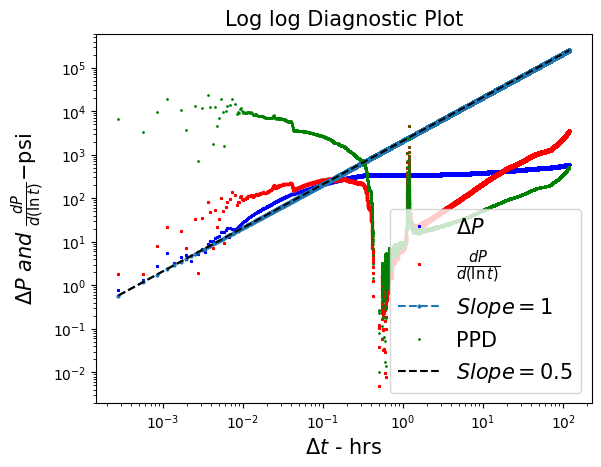

In [42]:
fig, ax = plt.subplots()

plot1, = ax.loglog(T1['delta_t_hrs'], T1['delta_p_psi'], 'b*',markersize = 2, label=r'$\Delta P$')
plot2, = ax.loglog(T1['delta_t_hrs'], T1['m_graph1'], 'r*', markersize=2, label=r'$\frac{dP}{d(\ln t)}$')
plot3, = ax.loglog(T1['delta_t_hrs'], T1['p_line_fall_off'], 'o--', markersize = 2, label=r'$Slope = 1$')
plot4, = ax.loglog(T1['delta_t_hrs'], T1['PPD1'], 'g.', markersize = 2, label='PPD')
plot5, = ax.loglog(T1['delta_t_hrs'], T1['p_line_fall_off'], 'k--', label=r'$Slope = 0.5$')

ax.set_xlabel(r'$\Delta t$ - hrs', fontsize=15)
ax.set_ylabel(r'$\Delta P \ and\  \frac{dP}{d(\ln t)}  \mathrm{-} \mathrm{psi}$', fontsize=15, fontweight='bold')
ax.legend(fontsize=15, loc='lower right')
ax.set_title('Log log Diagnostic Plot', fontsize = 15)
plt.show()

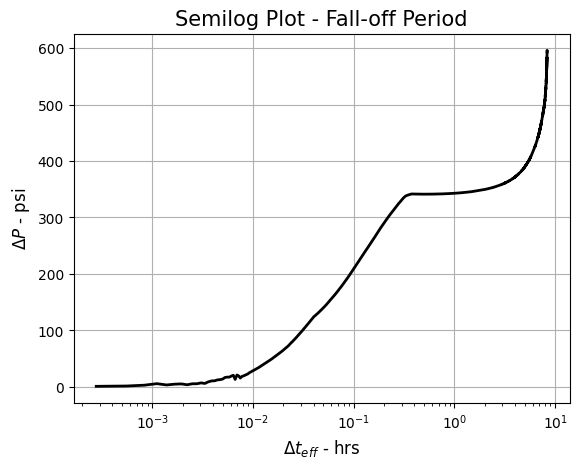

In [43]:
plt.figure()
plt.semilogx(T1['effective_time'], T1['delta_p_psi'], 'k', linewidth=2)
plt.xlabel(r'$\Delta t_{eff}$ - hrs', fontsize=12, fontweight='normal')
plt.ylabel(r'$\Delta P$ - psi', fontsize=12, fontweight='normal')
plt.title('Semilog Plot - Fall-off Period', fontsize=15)
plt.grid()  
plt.show()

enter x5_1 value 9
enter x5_2 value 4
enter y5_1 value 6
enter y5_2 value 4


/tmp/ipykernel_36/507581275.py:18: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim([0, 10])
/tmp/ipykernel_36/507581275.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0, 5])


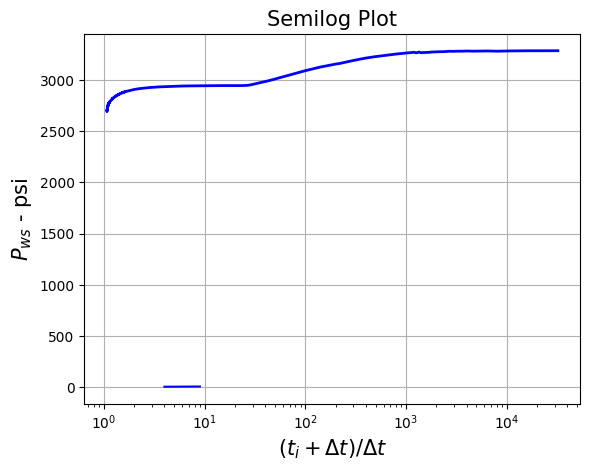

In [44]:
plt.figure()
plt.semilogx(build_up_time, fall_off_pressure, 'b', linewidth=2)
plt.xlabel(r'$(t_i + \Delta t) / \Delta t$', fontsize=15, fontweight='normal')
plt.ylabel(r'$P_{ws}$ - psi', fontsize=15, fontweight='normal')

x5_1 = float(input("enter x5_1 value"))
x5_2 = float(input("enter x5_2 value"))
y5_1 = float(input("enter y5_1 value"))
y5_2 = float(input("enter y5_2 value"))

plt.plot([x5_1,x5_2], [y5_1, y5_2], 'b')

slope = abs(2.303 * ((y5_2 - y5_1) / (np.log(x5_2) - np.log(x5_1))))

perm_conventional = (162.6 * reservoir_properties['Flow_Rate'].iloc[0] * reservoir_properties['Viscosity'].iloc[0] * reservoir_properties['FVF'].iloc[0]/ slope / reservoir_properties['Formation_Thickness'].iloc[0])


ax.set_xlim([0, 10])
ax.set_ylim([0, 5])
plt.title('Semilog Plot', fontsize=15)
plt.grid()  
plt.show()

In [45]:
table_for_use = pd.DataFrame({'delta_t_hrs': delta_t_hrs, 'effective_time': effective_time, 'fall_off_pressure': fall_off_pressure})


Text(0, 0.5, 'P_ws - psi')

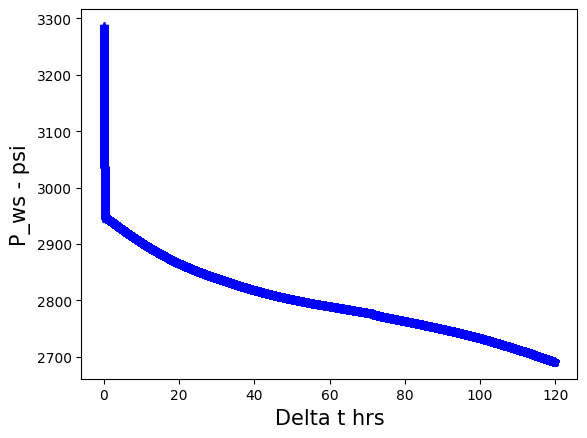

In [46]:
plt.figure()
plt.plot(table_for_use['delta_t_hrs'], table_for_use['fall_off_pressure'], 'b*', linewidth = 0.5)
plt.xlabel('Delta t hrs', fontsize = 15)
plt.ylabel('P_ws - psi', fontsize = 15)


In [47]:
well_test_data

,0,1,2,3,4,5
0,1,02-07-2024 07:55,0.000278,0.083837,29.464925,'
1,2,02-07-2024 07:55,0.000556,0.083861,29.476952,'
2,3,02-07-2024 07:55,0.000833,0.083563,29.484102,'
3,4,02-07-2024 07:55,0.001111,0.082731,29.493327,'
4,5,02-07-2024 07:55,0.001389,0.082442,29.503041,'
...,...,...,...,...,...,...
567456,567457,08-07-2024 21:33,157.626944,27.264224,29.103718,'
567457,567458,08-07-2024 21:33,157.627222,27.267865,29.104595,'
567458,567459,08-07-2024 21:33,157.627500,27.272920,29.105251,'
567459,567460,08-07-2024 21:33,157.627778,27.280340,29.105616,'


In [48]:
extracted_data_injection = well_test_data[(well_test_data[2]>= injection_start_time) & (well_test_data[2]<=injection_end_time)]
h2 = len(extracted_data_injection)
injection_time = extracted_data_injection.iloc[:, 2].to_numpy()
injection_pressure = extracted_data_injection.iloc[:, 3].to_numpy()

In [49]:
delta_injection_pressure = [0]*h2
for i in range(h2):
    if i==0:
        delta_injection_pressure[i] = 0
    else:
        delta_injection_pressure[i] = injection_pressure[i]- injection_pressure[i-1]
        
delta_injection_pressure = np.transpose(delta_injection_pressure)
well_test_table2 = pd.DataFrame({'injection_time': injection_time, 'injection_pressure': injection_pressure, 'delta_injection_pressure': delta_injection_pressure})

In [50]:
well_test_table2

,injection_time,injection_pressure,delta_injection_pressure
0,16.332222,1487.653936,0.000000
1,16.332500,1487.695765,0.041829
2,16.332778,1487.740125,0.044360
3,16.333056,1487.785444,0.045319
4,16.333333,1487.831536,0.046092
...,...,...,...
32253,25.291389,3287.193638,0.404146
32254,25.291667,3287.054372,-0.139266
32255,25.291944,3286.026679,-1.027693
32256,25.292222,3286.649399,0.622720


In [51]:
extracted_data_injection2 = well_test_table2[(well_test_table2.iloc[:, 2]>0)]

delta_t_injection = (extracted_data_injection2['injection_time']-extracted_data_injection2['injection_time'].iloc[1]).to_numpy()
delta_p_injection = (extracted_data_injection2['injection_pressure']-extracted_data_injection2['injection_pressure'].iloc[1]).to_numpy()

injection_table = pd.DataFrame({'delta_t_injection': delta_t_injection, 'delta_p_injection': delta_p_injection})

In [52]:
T2

NameError: name 'T2' is not defined

In [ ]:
fall_off_table = pd.DataFrame([fall_off_time, fall_off_pressure])
time_test1 = fall_off_table.iloc[:,1].to_numpy
pressure1 = fall_off_table.iloc[:, 2].to_numpy

dpdt_inj = (np.diff(injection_table['delta_p_injection']))/(np.diff(injection_table['delta_t_injection']))
dpdt_inj = np.insert(dpdt_inj, 0, np.nan)
injection_table['pressure_derivative_injection'] = injection_table['delta_t_injection']*dpdt_inj



In [ ]:
plt.figure()

plt.loglog(injection_table['delta_t_injection'], injection_table['delta_p_injection'], label='Delta P Injection')
plt.loglog(injection_table['delta_t_injection'], injection_table['pressure_derivative_injection'], label='Pressure Derivative Injection')

log_delta_t_injection = np.log(injection_table['delta_t_injection'])

T3 = pd.DataFrame({
    'delta_t_injection': injection_table['delta_t_injection'],
    'delta_p_injection': injection_table['delta_p_injection'],
    'log_delta_t_injection': log_delta_t_injection
})

T3 = T3[T3['delta_t_injection'] != 0]

smoothing_parameter_injection = 0.05
    
T3['offset_log_delta_t_injection'] = -T3['log_delta_t_injection'][::-1].values
T3['offset_delta_p_injection'] = T3['delta_p_injection'][::-1].values

# Interpolating for XL, PL, XR, PR
interp_log_deltat = interp1d(T3['log_delta_t_injection'], T3['log_delta_t_injection'], fill_value="extrapolate")
interp_deltaP_injection = interp1d(T3['log_delta_t_injection'], T3['delta_p_injection'], fill_value="extrapolate")
interp_offset_log_deltat = interp1d(T3['offset_log_delta_t_injection'], T3['offset_log_delta_t_injection'], fill_value="extrapolate")
interp_offset_deltaP = interp1d(T3['offset_log_delta_t_injection'], T3['offset_delta_p_injection'], fill_value="extrapolate")

T3['XL'] = interp_log_deltat(T3['log_delta_t_injection'] - smoothing_parameter_injection)
T3['PL'] = interp_deltaP_injection(T3['log_delta_t_injection'] - smoothing_parameter_injection)
T3['XR'] = -interp_offset_log_deltat(-T3['log_delta_t_injection'] - smoothing_parameter_injection)
T3['PR'] = interp_offset_deltaP(-T3['log_delta_t_injection'] - smoothing_parameter_injection)

# Calculating slopes (mL and mR)
T3['mL'] = (T3['delta_p_injection'] - T3['PL']) / (T3['log_delta_t_injection'] - T3['XL'])
T3['mR'] = (T3['PR'] - T3['delta_p_injection']) / (T3['XR'] - T3['log_delta_t_injection'])

# Calculate the m_graph1
T3['m_graph1'] = ((T3['mL'] * (T3['XR'] - T3['log_delta_t_injection'])) + (T3['mR'] * (T3['log_delta_t_injection'] - T3['XL']))) / (T3['XR'] - T3['XL'])

plt.legend()
plt.show()



In [ ]:
fig, ax = plt.subplots()

plot1, = ax.loglog(delta_t_injection, delta_p_injection, "b", linewidth=2)
plot2, = ax.loglog(injection_table['delta_t_injection'], injection_table['pressure_derivative_injection'], 'r--')
plot3, = ax.loglog(T3['delta_t_injection'], T3['m_graph1'])

ax.set_xlabel(r'$\Delta t$ - hrs', fontsize=15)
ax.set_ylabel(r'$\Delta P \ and\  \frac{dP}{d(\ln t)}  \mathrm{-} \mathrm{psi}$', fontsize=15)
ax.legend([plot1, plot2, plot3], [r'$\Delta P$', r'$\frac{dP}{d(\ln t)}$', r'$Smoothened Derivative$'],
          fontsize=15, loc='lower right')
plt.show()


In [ ]:
b2 = 1
a2 = T3['delta_p_injection'].iloc[0]/(T3['delta_t_injection'].iloc[0])**b2
T3['p_line_injection'] = a2*(T3['delta_t_injection']**b2)

In [ ]:
fig, ax = plt.subplots()

plot1, = ax.loglog(delta_t_injection, delta_p_injection, "b", linewidth=2)
plot2, = ax.loglog(T3['delta_t_injection'], T3['m_graph1'], 'r', linewidth=2)
plot3, = ax.loglog(T3['delta_t_injection'], T3['p_line_injection'], 'k--')

ax.set_xlabel(r'$\Delta t$ - hrs', fontsize=15)
ax.set_ylabel(r'$\Delta P \ and\  \frac{dP}{d(\ln t)}  \mathrm{-} \mathrm{psi}$', fontsize=15)
ax.set_title('Log-log Diagnostic Plot - Injection Period', fontsize=15)
ax.legend([plot1, plot2, plot3],[r'$\Delta P$', r'$\frac{dP}{d(\ln t)}$', r'$Slope = 1$'],fontsize=15, loc='lower right')
plt.show()


In [ ]:
x6

In [ ]:
L4 = T3[(T3.iloc[:, 0] >= x6[0]) & (T3.iloc[:, 0] <= x6[1])]
ExtractedData_Injection_2 = L4.copy()

In [ ]:
fig, ax = plt.subplots()
ax.semilogx(ExtractedData_Injection_2['Superposition_Time_Injection'], 
            ExtractedData_Injection_2['Rate_Normalized_Pressure'], 
            "b*", markersize=2)
ax.set_xlabel('Superposition Time - Injection')
ax.set_ylabel('Rate Normalized Pressure')
plt.show()

# Convert tables to numpy arrays
Time_Test2 = Injection_Table.iloc[:, 0].to_numpy()  # First column
Pressure2 = Injection_Table.iloc[:, 1].to_numpy()   # Second column

# Concatenate arrays with Time_Test1 and Pressure1 (assuming they exist as numpy arrays)
Time_Test = np.concatenate((Time_Test2, Time_Test1))
Pressure = np.concatenate((Pressure2, Pressure1))

# Create a Pandas DataFrame
T2 = pd.DataFrame({'Time_Test': Time_Test, 'Pressure': Pressure})

# Plot the concatenated data
plt.figure()
plt.plot(Time_Test, Pressure)
plt.xlabel('Time Test')
plt.ylabel('Pressure')
plt.title('Time Test vs Pressure')
plt.show()
